# Keras

In [19]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test, x_train = x_test / 255., x_train / 255.
print(y_train[:10], y_test[:10])
training_epochs = 15

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=training_epochs, validation_split=0.2)
score = model.evaluate(x_test, y_test, verbose=2)

[5 0 4 1 9 2 1 3 1 4] [7 2 1 0 4 1 4 9 5 9]
Epoch 1/15
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3202 - accuracy: 0.9068 - val_loss: 0.1527 - val_accuracy: 0.9570
Epoch 2/15
1500/1500 [==============================] - 14s 10ms/step - loss: 0.1533 - accuracy: 0.9552 - val_loss: 0.1082 - val_accuracy: 0.9703
Epoch 3/15
1500/1500 [==============================] - 14s 9ms/step - loss: 0.1148 - accuracy: 0.9645 - val_loss: 0.0959 - val_accuracy: 0.9715
Epoch 4/15
1500/1500 [==============================] - 14s 10ms/step - loss: 0.0945 - accuracy: 0.9708 - val_loss: 0.0911 - val_accuracy: 0.9723
Epoch 5/15
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0794 - accuracy: 0.9749 - val_loss: 0.0797 - val_accuracy: 0.9753
Epoch 6/15
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0698 - accuracy: 0.9777 - val_loss: 0.0824 - val_accuracy: 0.9754
Epoch 7/15
1500/1500 [==============================] - 14s 9ms/step - loss: 0.059

In [13]:
h = model.fit(x_train, y_train, epochs=1, validation_split=0.2)
score = model.evaluate(x_test, y_test, verbose=2)

1500/1500 [==============================] - 17s 11ms/step - loss: 0.0312 - accuracy: 0.9894 - val_loss: 0.0105 - val_accuracy: 0.9966
313/313 - 1s - loss: 0.0761 - accuracy: 0.9823


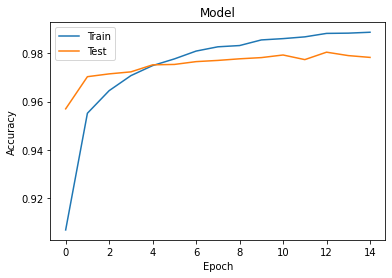

In [20]:
import matplotlib.pyplot as plt
def vis(h, roi):
    plt.plot(h.history[roi])
    plt.plot(h.history["val_"+roi])
    plt.title("Model" + roi)
    plt.xlabel("Epoch")
    plt.ylabel(roi.title())
    plt.legend(["Train", "Test"], loc="upper left")
    plt.show()
vis(h, "accuracy")

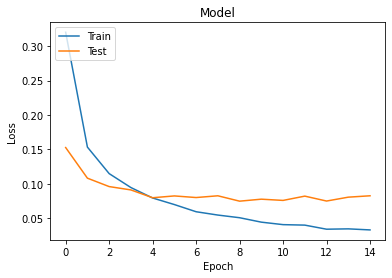

In [21]:
vis(h, "loss")

In [22]:
tf.argmax(model.predict(x_test), 1)

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([7, 2, 1, ..., 4, 5, 6])>

In [24]:
y_test[:]

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [25]:
score[0], score[1] # loss, accuracy

(0.06683700531721115, 0.9805999994277954)

In [40]:
predicted = tf.argmax(model.predict(x_train), 1)

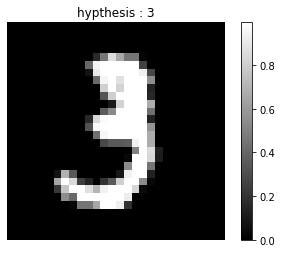

Ground Truth: 3
Predicted   : 3


In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
def draw_and_label(i_sample):
    hypothesis = predicted[i_sample]
    
    plt.figure()
    plt.imshow(x_train[i_sample], cmap='gray')
    plt.axis('off')
    plt.colorbar()
    plt.grid(False)
    plt.title(f"hypthesis : {hypothesis}")
    plt.show()
    print(f"Ground Truth: {str(y_train[i_sample])}")
    print(f"Predicted   : {hypothesis}")

draw_and_label(10)

# TF2 CNN 
# Functional

In [15]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))
x_train, x_test = x_train / 255., x_test / 255.

inputs = tf.keras.Input(shape=(28, 28, 1), name="original_img")
l1 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(inputs)
l2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(l1)
l3 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(l2)
l4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(l3)
l5 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(l4)
l6 = tf.keras.layers.Flatten()(l5)
l7 = tf.keras.layers.Dense(64, activation='relu')(l6)
outputs = tf.keras.layers.Dense(10, activation='softmax')(l7)


model = tf.keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [16]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
original_img (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               

# Sequential

In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))
x_train, x_test = x_train / 255., x_test / 255.

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [17]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=5, verbose=5)

Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5


In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"{test_loss}, {test_acc*100}")

313/313 - 3s - loss: 0.0286 - accuracy: 0.9917
0.028628943488001823, 99.16999936103821


RGBImage , (241, 320, 3)
(241, 320)       0
(3, 241, 320)
[[[223   0   0]
  [224   0   0]
  [224   0   0]
  ...
  [218   0   0]
  [218   0   0]
  [216   0   0]]

 [[224   0   0]
  [224   0   0]
  [224   0   0]
  ...
  [218   0   0]
  [218   0   0]
  [216   0   0]]

 [[224   0   0]
  [224   0   0]
  [224   0   0]
  ...
  [218   0   0]
  [216   0   0]
  [216   0   0]]

 ...

 [[138   0   0]
  [138   0   0]
  [144   0   0]
  ...
  [198   0   0]
  [196   0   0]
  [194   0   0]]

 [[144   0   0]
  [134   0   0]
  [135   0   0]
  ...
  [200   0   0]
  [200   0   0]
  [200   0   0]]

 [[148   0   0]
  [145   0   0]
  [143   0   0]
  ...
  [200   0   0]
  [198   0   0]
  [196   0   0]]]
Red channel , (241, 320, 3)
(241, 320)       1
(3, 241, 320)
[[[  0 220   0]
  [  0 221   0]
  [  0 221   0]
  ...
  [  0 213   0]
  [  0 213   0]
  [  0 213   0]]

 [[  0 221   0]
  [  0 221   0]
  [  0 221   0]
  ...
  [  0 213   0]
  [  0 213   0]
  [  0 213   0]]

 [[  0 221   0]
  [  0 221   0]
  [  0 221 

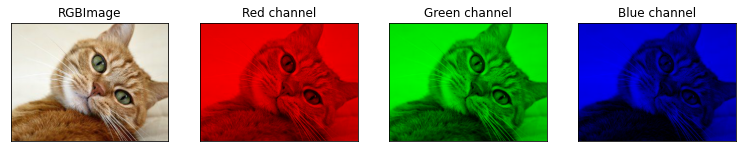

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt

image_path = tf.keras.utils.get_file("cat.jpg", "http://bit.ly/33U6mH9")
image = plt.imread(image_path)
titles = ["RGBImage", "Red channel", "Green channel", "Blue channel"]
cmaps = [None, plt.cm.Reds_r, plt.cm.Greens_r, plt.cm.Blues_r]

from numpy import array, zeros_like
def channel(image, color):
    if color not in (0, 1, 2): return image
    c = image[..., color]
    z = zeros_like(c)
    check = array([(c, z, z), (z, c, z), (z, z, c)][color])
    print(z.shape, '     ', color)
    print(check.shape)
    print(check.transpose(1,2,0))
    return check.transpose(1, 2, 0)

colors = range(-1, 3)
fig, axes = plt.subplots(1, 4, figsize=(13,3))
objs = zip(axes, titles, colors)
for ax, title, color in objs:
    img = channel(image, color)
    print(f"{title} , {img.shape}")
    ax.imshow(img)
    ax.set_title(title)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 15488)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1982592   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,997,930
Trainable params: 1,997,930
Non-trainable params: 0
______________________________________________

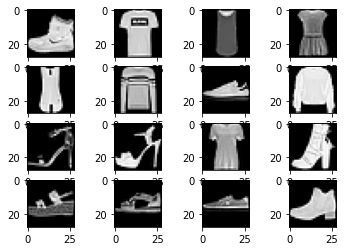

In [16]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()
train_X, test_X = train_X / 255., test_X / 255.
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
for c in range(16):
    plt.subplot(4, 4, c+1)
    plt.imshow(train_X[c].reshape(28, 28), cmap="gray")

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])
model.summary()

In [17]:
model.fit(train_X, train_Y, epochs=10, verbose=2)

Epoch 1/10
1875/1875 - 44s - loss: 0.4438 - accuracy: 0.8403
Epoch 2/10
1875/1875 - 43s - loss: 0.3288 - accuracy: 0.8796
Epoch 3/10
1875/1875 - 44s - loss: 0.2785 - accuracy: 0.8967
Epoch 4/10
1875/1875 - 44s - loss: 0.2412 - accuracy: 0.9112
Epoch 5/10
1875/1875 - 43s - loss: 0.2055 - accuracy: 0.9223
Epoch 6/10
1875/1875 - 42s - loss: 0.1809 - accuracy: 0.9335
Epoch 7/10
1875/1875 - 43s - loss: 0.1631 - accuracy: 0.9391
Epoch 8/10
1875/1875 - 43s - loss: 0.1454 - accuracy: 0.9457
Epoch 9/10
1875/1875 - 44s - loss: 0.1320 - accuracy: 0.9515
Epoch 10/10
1875/1875 - 44s - loss: 0.1207 - accuracy: 0.9543


In [18]:
loss, acc = model.evaluate(test_X, test_Y, verbose=2)
print(f"loss : {loss}, accuracy : {acc}")

313/313 - 3s - loss: 0.5740 - accuracy: 0.8690
loss : 0.5739628672599792, accuracy : 0.8690000176429749


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


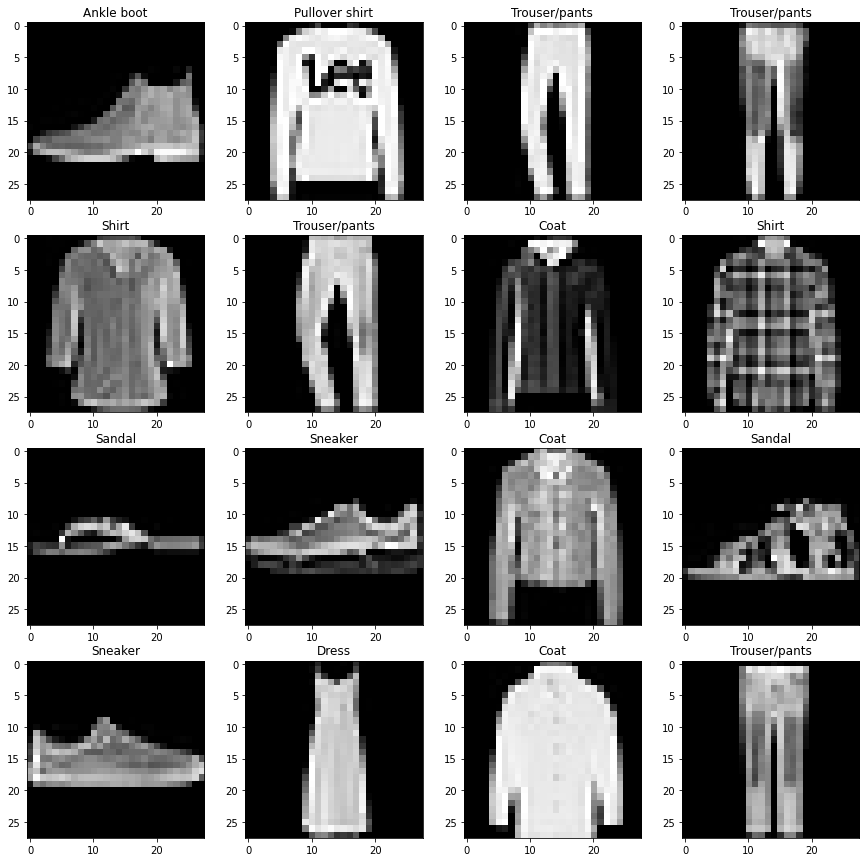

In [27]:
lab = ["T-shirt/top",
      "Trouser/pants",
      "Pullover shirt",
      "Dress",
      "Coat",
      "Sandal",
      "Shirt",
      "Sneaker",
      "Bag",
      "Ankle boot"]
hypothesis = tf.argmax(model.predict(test_X), 1).numpy()
d =  {}
for i, x in enumerate(lab):
    d[i] = x
    
fg_color = "red"
bg_color = "black"
plt.figure(figsize=(15, 15))
for c in range(16):
    co = test_Y[c] == hypothesis[c]
    print(co)
    plt.subplot(4, 4, c+1)
    plt.imshow(test_X[c].reshape(28 ,28), cmap="gray")
    if co:
        plt.title(d[hypothesis[c]], color=bg_color)
    else:
        plt.title(d[test_Y[c]]+'/'+d[hypothesis[c]], color=fg_color)

In [22]:
import numpy as np
a = np.array([[1,2,3], [4,5,6]])
print(a.T.shape)
a.T

(3, 2)


array([[1, 4],
       [2, 5],
       [3, 6]])

In [23]:
np.reshape(a, (3, 2))

array([[1, 2],
       [3, 4],
       [5, 6]])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

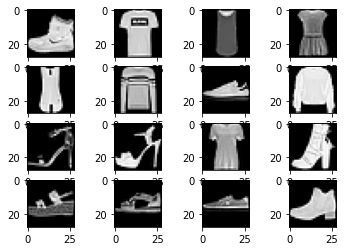

In [29]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()
train_X, test_X = train_X / 255., test_X / 255.
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
for c in range(16):
    plt.subplot(4, 4, c+1)
    plt.imshow(train_X[c].reshape(28, 28), cmap="gray")

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(strides=(2, 2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3)),
    tf.keras.layers.MaxPooling2D(strides=(2, 2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(rate=.3),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])
model.summary()

In [37]:
h = model.fit(train_X, train_Y, validation_split=0.2, epochs=1, verbose=2)

1500/1500 - 24s - loss: 0.2136 - accuracy: 0.9202 - val_loss: 0.1906 - val_accuracy: 0.9277


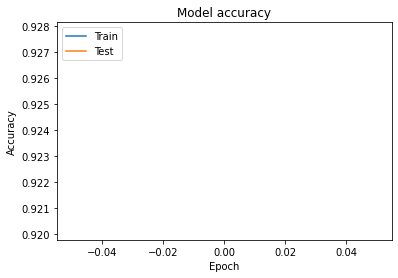

In [38]:
import matplotlib.pyplot as plt
def vis(h, roi):
    plt.plot(h.history[roi])
    plt.plot(h.history['val_'+roi])
    plt.title("Model " + roi)
    plt.xlabel("Epoch")
    plt.ylabel(roi.title())
    plt.legend(["Train", "Test"], loc="upper left")
    plt.show()
    
vis(h, "accuracy")

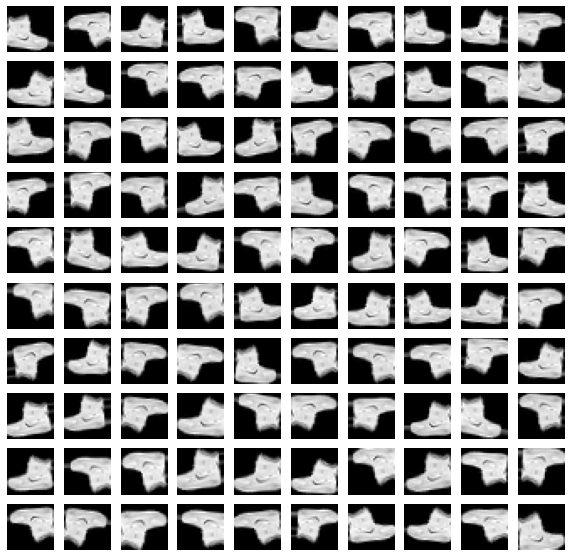

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

image_generator = ImageDataGenerator(rotation_range=10, zoom_range=0.10, shear_range=0.5, width_shift_range=0.10,
                                    height_shift_range=0.10, horizontal_flip=True, vertical_flip=True)

augment_size=100

x_augmented = image_generator.flow(np.tile(train_X[0].reshape(28*28), 100).reshape(-1,28,28,1), np.zeros(augment_size),
                                  batch_size=augment_size, shuffle=False).next()[0]

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for c in range(100):
    plt.subplot(10, 10, c+1)
    plt.axis("off")
    plt.imshow(x_augmented[c].reshape(28,28), cmap="gray")
plt.show()

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

image_generator = ImageDataGenerator(rotation_range=10, zoom_range=0.10, shear_range=0.5, width_shift_range=0.10,
                                    height_shift_range=0.10, horizontal_flip=True, vertical_flip=True)

augment_size = 30000
randidx = np.random.randint(train_X.shape[0], size=augment_size)
x_augmented = train_X[randidx].copy()
y_augmented = train_Y[randidx].copy()
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size),
                                  batch_size=augment_size, shuffle=False).next()[0]

train_X = np.concatenate((train_X, x_augmented))
train_Y = np.concatenate((train_Y, y_augmented))

print(train_X.shape)

(90000, 28, 28, 1)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 256)        

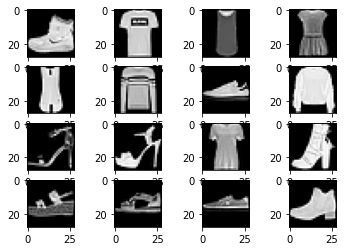

In [46]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()
train_X, test_X = train_X / 255., test_X / 255.
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
for c in range(16):
    plt.subplot(4, 4, c+1)
    plt.imshow(train_X[c].reshape(28, 28), cmap="gray")

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(strides=(2, 2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding="valid", activation="relu"),
    tf.keras.layers.MaxPooling2D(strides=(2, 2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])
model.summary()

NameError: name 'history' is not defined

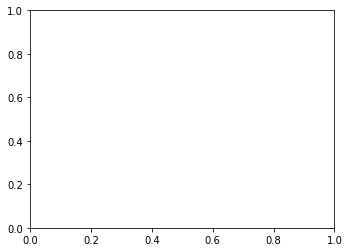

In [48]:
h = model.fit(train_X, train_Y, validation_split=0.2, epochs=10, verbose=0)

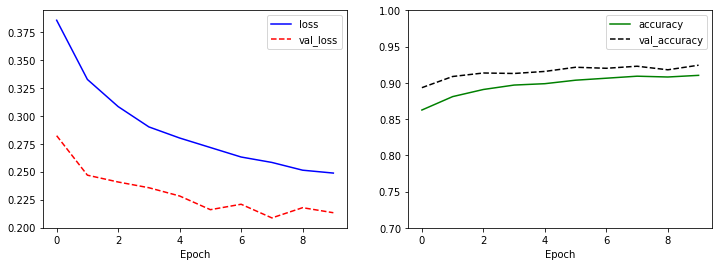

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(h.history["loss"], "b-", label="loss")
plt.plot(h.history["val_loss"], "r--", label="val_loss")
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(h.history["accuracy"], "g-", label="accuracy")
plt.plot(h.history["val_accuracy"], "k--", label="val_accuracy")
plt.xlabel("Epoch")
plt.ylim(0.7, 1)
plt.legend()

plt.show()